In [1]:
import pymisca.util as pyutil; reload(pyutil)
np = pyutil.np; plt = pyutil.plt; pd = pyutil.pd
import pymisca.vis_util as pyvis; reload(pyvis)

if pyutil.is_ipython:
    ipy = get_ipython()
    ipy.magic('matplotlib inline')

is in ipython: 1
is in ipython: 1
is in ipython: 1
[WARN] pymisca.vis_util cannot find network
[WARN] pymisca.vis_util cannot find network


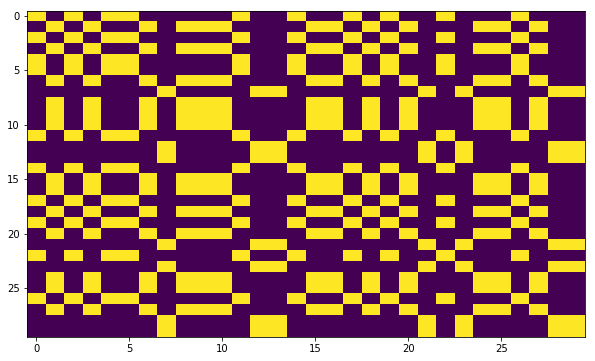

In [2]:
D = 30
seed = 15
np.random.seed(seed)

def uniform(size=(D,1),seed=None,):
    lab = np.random.randint(3,size=size)
    return lab
orig= lab = uniform()
Adj = lab == lab.T
pyvis.heatmap(Adj)

In [3]:
# samp.shape
# outer = samp.T[:,None] == samp.T[:,:,None]


In [4]:
# isinstance(tf.convert_to_tensor(obs),tf.Tensor)

In [5]:
def selfOuter(x):
    x = np.ravel(x)
    y = x[None]* x[:,None]
    return y

def make_energy_func(Amat0):
    def energyF(obs,bkd=np):
        if isinstance(obs,np.ndarray):
            bkd= np
            lastDim = bkd.shape(obs)[-1] 
        elif isinstance(obs,tf.Tensor):
            bkd = tf
            lastDim = obs._shape[-1]
#         lastDim = bkd.shape(obs)[-1] 
        print (lastDim)
        if lastDim== 1:
            obsA = obs == bkd.transpose(obs)
            Amat = Amat0
        elif lastDim > 1:
            samp = obs
            obsA = bkd.transpose(samp)[:,None] == bkd.transpose(samp)[:,:,None]
            Amat = Amat0[None]
#         print (obsA.shape,Amat.shape)
        E = (obsA-0.5) * (Amat-0.5)
        if bkd is np:
            E = -bkd.mean( E,axis=(-1,-2))
            
        return E
    return energyF

ef = make_energy_func(Adj)

1
('minE', -0.25)
150000


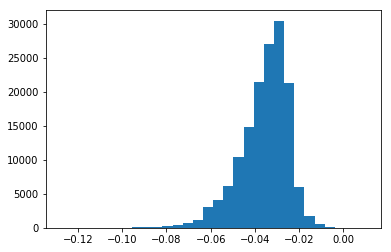

In [6]:
ef = make_energy_func(Adj)
samp = uniform(size=(D,150000))
# ef(samp), ef(lab)
minE = ef(orig)
print ('minE',minE)
E = ef(samp)
assert np.min(E) >= minE

plt.hist(E,30);

In [7]:
!free -h 

              total        used        free      shared  buff/cache   available
Mem:           7.5G        1.5G        4.9G        344M        1.0G        5.3G
Swap:          7.5G        1.7G        5.7G


# 

let E be the energy of the configuration $E=E(\phi)$, the partition function is known to be 

$$
Z = \sum_i e^{-E_i}
$$

In [8]:

# out > 1 
# np.ones 

In [9]:
invtemp = 110.0
p = np.exp(-E * invtemp)
p = p/p.sum()
sumP = np.cumsum(p)
# stick = sumP/sumP[-1]

# import collections
N =  2000
idx = np.argmax(
    np.random.random(size=(N,1))
        <sumP[None],
    axis=-1)
out = pyutil.collections.Counter(idx).values()
# out = np.random.multinomial(1000,p)
# print (pyutil.collections.Counter(out))
# idx = np.where(out>0)[0]

print (pyutil.collections.Counter(out))

npobs = obs = samp.T[idx]
# obs.shape

Counter({1: 1093, 2: 70, 3: 27, 5: 11, 4: 10, 6: 3, 7: 3, 14: 3, 8: 2, 9: 2, 16: 2, 32: 1, 74: 1, 44: 1, 15: 1, 85: 1, 33: 1, 59: 1, 37: 1, 65: 1})


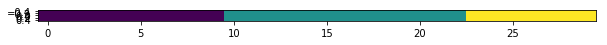

In [10]:
ood = np.argsort(orig.ravel())

pyvis.heatmap(orig[ood].T)

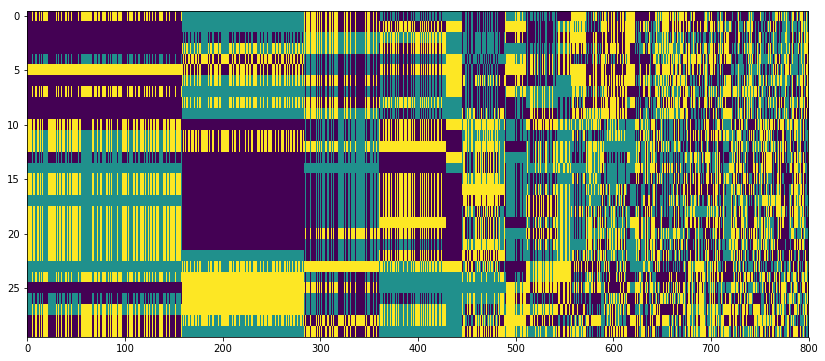

In [11]:
Eobs = E[idx]

od = np.argsort(Eobs)

Y = obs.T[ood].T[od[:800]]
pyvis.heatmap(Y.T)

In [12]:
# del samp

Assumes likelihood function 

$$\begin{align}
L &= p(X | M) = \prod_i\exp [-G(X_i | M)] \\
\log L &= \sum_i \log p(X|M)\\
  &= \sum_i -G(X_i|M)
\end{align}$$

In [13]:
def ef_ts(obs):
    obs = tf.convert_to_tensor(obs)
    bkd = tf
    ts = tf.equal((obs)[:,None] ,(obs)[:,:,None])
    print ts.shape
    ts = tf.cast(ts,dtype='float32')
    esigma = tf.expand_dims(sigma,0)
    ts = - ( ts - 0.5 )  * ( esigma - 0.5) 
    eng = tf.reduce_mean(ts,(-1,-2))
    return eng

import pymisca.tensorflow_extra as pytf
import tensorflow as tf
from tensorflow.python.ops import nn
from tensorflow.python.ops import math_ops,array_ops

# data
x = tf.placeholder(dtype=tf.float32,shape=[None,D])
print x.shape

INIT_MU_PARAMS = {'loc': 0.0, 'scale': 0.1}
INIT_PHI_PARAMS = {'loc': 1.0, 'scale': 0.1}
RANDOM_SEED = 0

# params

# adj =  tf.Variable(initial_value=np.random.normal(**INIT_MU_PARAMS),
#                  dtype=tf.float32)
# np.random.seed(RANDOM_SEED)
# mu = nn.softplus(tf.Variable(initial_value=np.random.normal(**INIT_MU_PARAMS),
#                  dtype=tf.float32)
#                 )
# phi =nn.softplus( tf.Variable(initial_value=np.random.normal(**INIT_PHI_PARAMS),
#                   dtype=tf.float32)
#                 )
D = len(orig)
sigma = nn.sigmoid( tf.Variable(initial_value=np.random.normal(size=(D,D),
                                                               **INIT_PHI_PARAMS),
                  dtype=tf.float32)
                )

def makeEMD(mu,phi,sigma):
    ''' Instantiate an emission distribution from parameters
'''
    
    dist_rsq = tf.contrib.distributions.Gamma(concentration=mu,rate=phi)
    dist_xyz = pytf.AsRadial(distribution=dist_rsq,D=D)
    dist_aff = pytf.AffineTransformDiag(distribution=dist_xyz,
                                        scale_diag=sigma,)
    # gaussian_dist = tf.contrib.distributions.Normal(loc=mu, scale=sigma)
    # emission  = dist_rsq
    return dist_aff



# ss = tf.expand_dims(sigma,0).shape

# def energyT(x):

# emission = makeEMD(mu,phi,sigma)
# x_obs = obs
log_prob = -ef_ts(x)
# log_prob = emission.log_prob(value=x)

neg_log_likelihood = -1.0 * tf.reduce_mean(log_prob)

# gradient
vars_list = [sigma]
grad = tf.gradients(neg_log_likelihood, vars_list)

/home/shouldsee/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(?, 30)
(?, 30, 30)


In [14]:
x_obs = obs

#### Adapted from: http://kyleclo.github.io/maximum-likelihood-in-tensorflow-pt-1/

LEARNING_RATE = 0.1
MAX_ITER = 200
TOL_PARAM, TOL_LOSS, TOL_GRAD = 1e-8, 1e-8, 1e-8

# optimizer
# LEARNING_RATE = 1.
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)
# optimizer = tf.train.AdadeltaOptimizer(learning_rate=LEARNING_RATE)
train_op = optimizer.minimize(loss=neg_log_likelihood)

with tf.Session() as sess:
	# initialize
    sess.run(fetches=tf.global_variables_initializer())

    i = 1
    obs_vars = sess.run(fetches=[vars_list])
    obs_loss = sess.run(fetches=[neg_log_likelihood], feed_dict={x: x_obs})
    obs_grad = sess.run(fetches=[grad], feed_dict={x: x_obs})
        
    while True:
        # gradient step
        sess.run(fetches=train_op, feed_dict={x: x_obs})

        # update parameters
        new_vars = sess.run(fetches=vars_list)
#         diff_norm = np.linalg.norm(np.subtract([new_mu, new_phi],
#                                                [obs_mu[-1], obs_phi[-1]]))
        # update loss
        new_loss = sess.run(fetches=neg_log_likelihood, feed_dict={x: x_obs})
        loss_diff = np.abs(new_loss - obs_loss[-1])

        # update gradient
        new_grad = sess.run(fetches=grad, feed_dict={x: x_obs})
#         grad_norm = np.linalg.norm(np.hstack(map(np.ravel,new_grad)))
        
        obs_vars.append(new_vars)
        obs_loss.append(new_loss)
        obs_grad.append(new_grad)

#         if diff_norm < TOL_PARAM:
#             print('Parameter convergence in {} iterations!'.format(i))
#             break

        if loss_diff < TOL_LOSS:
            print('Loss function convergence in {} iterations!'.format(i))
            break

#         if grad_norm < TOL_GRAD:
#             print('Gradient convergence in {} iterations!'.format(i))
#             break

        if i >= MAX_ITER:
            print('Max number of iterations reached without convergence.')
            break

        i += 1
#         print (i)
        
        if not i%10:
            print (i,new_loss)



(10, -0.002946875)
(20, -0.044069115)
(30, -0.06955655)
(40, -0.08076809)
(50, -0.085462876)
(60, -0.087667726)
(70, -0.08886962)
(80, -0.089618035)
(90, -0.09013423)
(100, -0.09051687)
(110, -0.09081459)
(120, -0.09105406)
(130, -0.0912512)
(140, -0.09141628)
(150, -0.09155643)
(160, -0.09167655)
(170, -0.091780856)
(180, -0.09187177)
(190, -0.09195183)
(200, -0.09202277)
Max number of iterations reached without convergence.


In [15]:
np.exp(E)

array([0.96829138, 0.97368575, 0.97260448, ..., 0.93654701, 0.96185758,
       0.96614201])

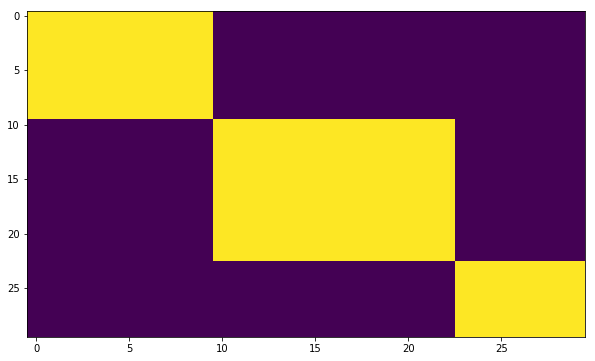

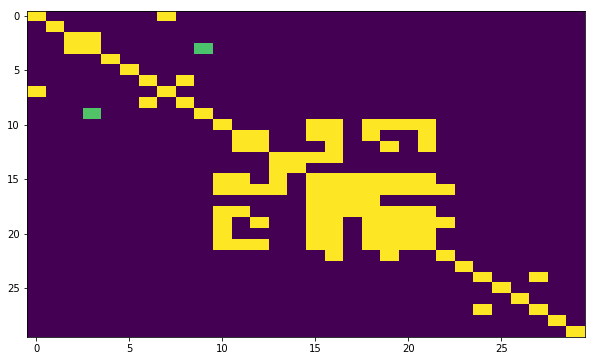

In [16]:
osig = obs_vars[-1][-1]


oorig = orig[ood]
pyvis.heatmap(oorig.T == oorig)

# obs_vars[-1][-1]

pyvis.heatmap(osig[ood].T[ood])

Conclusion: 

Variational inference of the network structure is possible if the samples were taken at a sufficiently low temperature (low $T$, high $\beta$).

Note that I am not including the partition function $Z$ in my loss here. But since partition function will be dominated by the most stable state, one can imagine to approximate it with some truncation. https://www.nature.com/articles/srep09050

See also [stats352](statweb.stanford.edu/~jtaylo/courses/stats352/notes/ising.pdf) for a Bayesian introduction

In [17]:
def sample(Amat):
    '''Use thermodynamic tricks to do sampling. instead of pure MCMC
'''
    pass
    